In [7]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

---

#### <u>다중 클래스 분류용 선형 모델</u>

(`로지스틱 회귀`만을 제외하고) 많은 `선형 분류 모델`은 태생적으로 `이진 분류`만을 지원한다.<br>
즉 `다중 클래스(multiclass)`를 지원하지 않는다는 의미이다. 그러므로, `이진 분류`알고리즘을 `다중 클래스 분류`알고리즘으로 확장하기 위해서 주로 `일대다 방법`을 사용한다.

<br>

- `일대다 방법(one-vs.-rest)`
    - `이진 분류`알고리즘을 `다중 클래스 분류` 알고리즘으로 확장하는 방법이다.
    - 각 클래스를 다른 모든 클래스와 구분하도록 `이진 분류`모델을 학습시킨다.
    - 결국 클래스의 수만큼 `이진 분류`모델이 만들어진다.
    - 예측할 때 이렇게 만들어진 모든 이진 분류기가 작동하여<br> <u>가장 점수가 높은 점수를 내는 분류기의 클래스를 에측값으로 선택</u>한다.
    
<br>

클래스별 이진 분류기를 만들면 각 클래스가 계수 백터(`w`)와 절편(`b`)를 하나씩 가지게 된다.<br>
결국 `분류 신뢰도`를 나타내는 다음 공식의 <u>결과값이 가장 높은 클래스</u>가 해당 데이터의 클래스 레이블로 할당된다.

> w[0] × x[0] + w[1] × x[1] + … + w[p] × x[p] + b

<br>

다음 세 개의 클래스를 가진 데이터셋에 `일대다 방식`을 적용해보자<br>
해당 데이터셋은 2차원이며 각 클래스의 데이터는 `정규분포(가우시안 분포)`를 따른다.

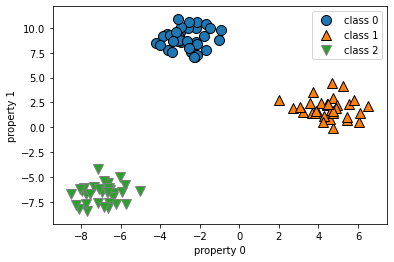

In [5]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("property 0")
plt.ylabel("property 1")
plt.legend(["class 0", "class 1", "class 2"])

<br>

먼저 `LinearSVC` 훈련결과를 확인해보자

In [14]:
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print()
print(linear_svm.intercept_)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

[[-0.17492627  0.23141057]
 [ 0.4762129  -0.0693673 ]
 [-0.18914077 -0.20400584]]
계수 배열의 크기:  (3, 2)

[-1.07745602  0.13140337 -0.08604988]
절편 배열의 크기:  (3,)


- `coef_`배열의 크기는 (3,2)이다.<br>
해당 배열의 행은 세 개의 클래스에 각각 대응하는 계수 벡터를 담고 있으며,<br>
열은 각 특성에 따른 계수 값을 가지고 있다.

- `intercept_`는 각 클래스의 절편을 담고 있다.

세 개의 이진 분류기가 만드는 경계를 시각화하면 다음과 같다.

> `-(line * coef[0] + intercept) / coef[1]`<br>
> <br>
> 위의 식은 기본적인 직선 공식(`Ax+By+C = 0`)에 기반되어있다.<br>
> <br>
> coef[0]x + coef[1]y + intercept = 0<br>
> (coef[0]/coef[1])*x + y + intercept/coef[1] = 0<br>
> y = -( (coef[0]/coef[1])*x + intercept/coef[1] )

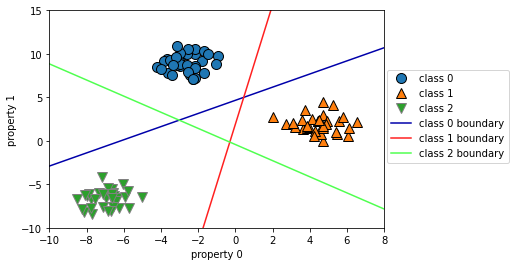

In [34]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.ylim(-10, 15)
    plt.xlim(-10, 8)
plt.xlabel("property 0")
plt.ylabel("property 1")
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary',
            'class 2 boundary'], loc=(1.01, 0.3))

각각의 선이 이진 분류 모델을 뜻한다. 클래스의 수 만큼 이진 분류 모델이 만들어진 것을 확인할 수 있다. 이를 토대로 `decision boundary`가 그려진다.

<br>

그렇다면 위의 그림 중앙의 세 분류기가 모두 나머지로 분류한 삼각형 영역은 어떻게되는 걸까? 해당 데이터 포인트는 가장 가까운 직선의 클래스가 될 것이다.

<br>

다음 예는 2차원 평면의 모든 포인트에 대한 예측 결과를 보여준다.


Text(0, 0.5, 'property 1')

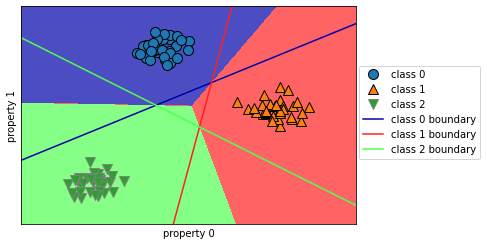

In [36]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)


for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,    
                                   mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

    
    plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary',
            'class 2 boundary'], loc=(1.01, 0.3))
plt.xlabel("property 0")
plt.ylabel("property 1")

---

#### <u>선형 모델의 매개변수</u>

선형 모델의 주요 매개변수는 다음과 같았다. 


- `회귀 모델` : alpha
    - alpha ↑ => 모델이 단순해짐

 <br>

- `LinearSVC`와 `LogisticRegression` : C
    - C ↓ => 모델이 단순해짐
    
<br>

특별히 `회귀 모델`에서는 이 매개변수를 조정하는 것이 매우 중요하다.<br>
보통 `C`와 `alpha`는 `로그 스케일`로 최적치를 정한다.

<br>

그리고 `L1 규제`를 사용할지 `L2 규제`를 사용할지도 정해야한다.<br>

- 중요한 특성이 많지 않음 => `L1 규제`
    - 특히, 해당 규제는 모델의 해석이 중요한 요소일 떄도 사용할 수 있다.<br>몇 가지 특성만 사용하므로 해당 모델에 중요한 특성이 무엇이고 그 효과가 어느 정도인지 설명하기 쉬워진다.
    
    <br>
    
- 중요한 특성이 많음 => `L2 규제`

---

#### <u>선형 모델의 장단점</u>



<b>장점</b>

- 학습 속도와 예측이 빠르다.

<br>

- 매우 큰 데이터셋과 희소한 데이터셋에서도 잘 작동한다.
    - 수십만에서 수백만 개의 샘플로 이뤄진 대용량 데이터셋이라면 기본 설정보다 빨리 처리하도록 `LogisticRegression`과 `Ridge`에 `solver='sag'` 옵션을 준다.
    - 다른 대안으로 `SDGClassifier`와 `SGDRegressor`을 사용할 수 있다.

<br>

- 회귀와 분류에서 본 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있다.

<br>

- 샘플에 비해 특성이 많을 때 잘 작동한다.<br>다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형 모델을 많이 사용한다.

<b>단점</b>

- 위에서 처럼 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있지만,<br>계수의 값들이 왜 그런지는 명확하지 않을 때가 종종있다.<br>특히 데이터셋의 특성들이 서로 깊게 연관되어 있을 때 그렇다.<br>그리고 이런 경우 계수 분석이 매우 어려울 수 있다.

<br>

- 특성이 적은 저차원 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋다.

---

### References

- 안드레아스 뮐러, 세라 가이도, 『파이썬 라이브러리를 활용한 머신러닝』, 박해선, 한빛미디어(2017)
- https://tensorflow.blog/%ed%8c%8c%ec%9d%b4%ec%8d%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d/2-3-3-%ec%84%a0%ed%98%95-%eb%aa%a8%eb%8d%b8/
- https://kolikim.tistory.com/9